# ***Importing Libraries***




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ***Loading Hotel Data Set***

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Hotel Booking Project/hotel_bookings 2.csv')

# ***EDA and Data Cleaning***

In [ ]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015


In [ ]:
df.tail(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [ ]:
df.shape #119390 rows and 32 columns in the data set

(119390, 32)

In [ ]:
df.columns #fetching all the columns of the data set

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.info()  #checking the datatypes of the colmuns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#reservation_status_date columns is in object data type but we need to convert it into datatime datatype
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], dayfirst=True) #doing dayfirst since the dates are in different formant

In [ ]:
df.describe(include = 'object') #checking all the object type columns using describe function

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [ ]:
#printing all the unique values of all object type col using for loop
for i in df.describe(include = 'object').columns:
  print(i)
  print(df[i].unique())
  print('-'*80)


hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DO

In [ ]:
#checking all the missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Missing value Treatment**

In [ ]:
#we will remove the columns with very large missing values
df.drop(['agent','company'],axis = 1, inplace = True)

In [ ]:
#we will remove rows of the columns with less missing values
df.dropna(inplace = True)

**Outlier Treatment**

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


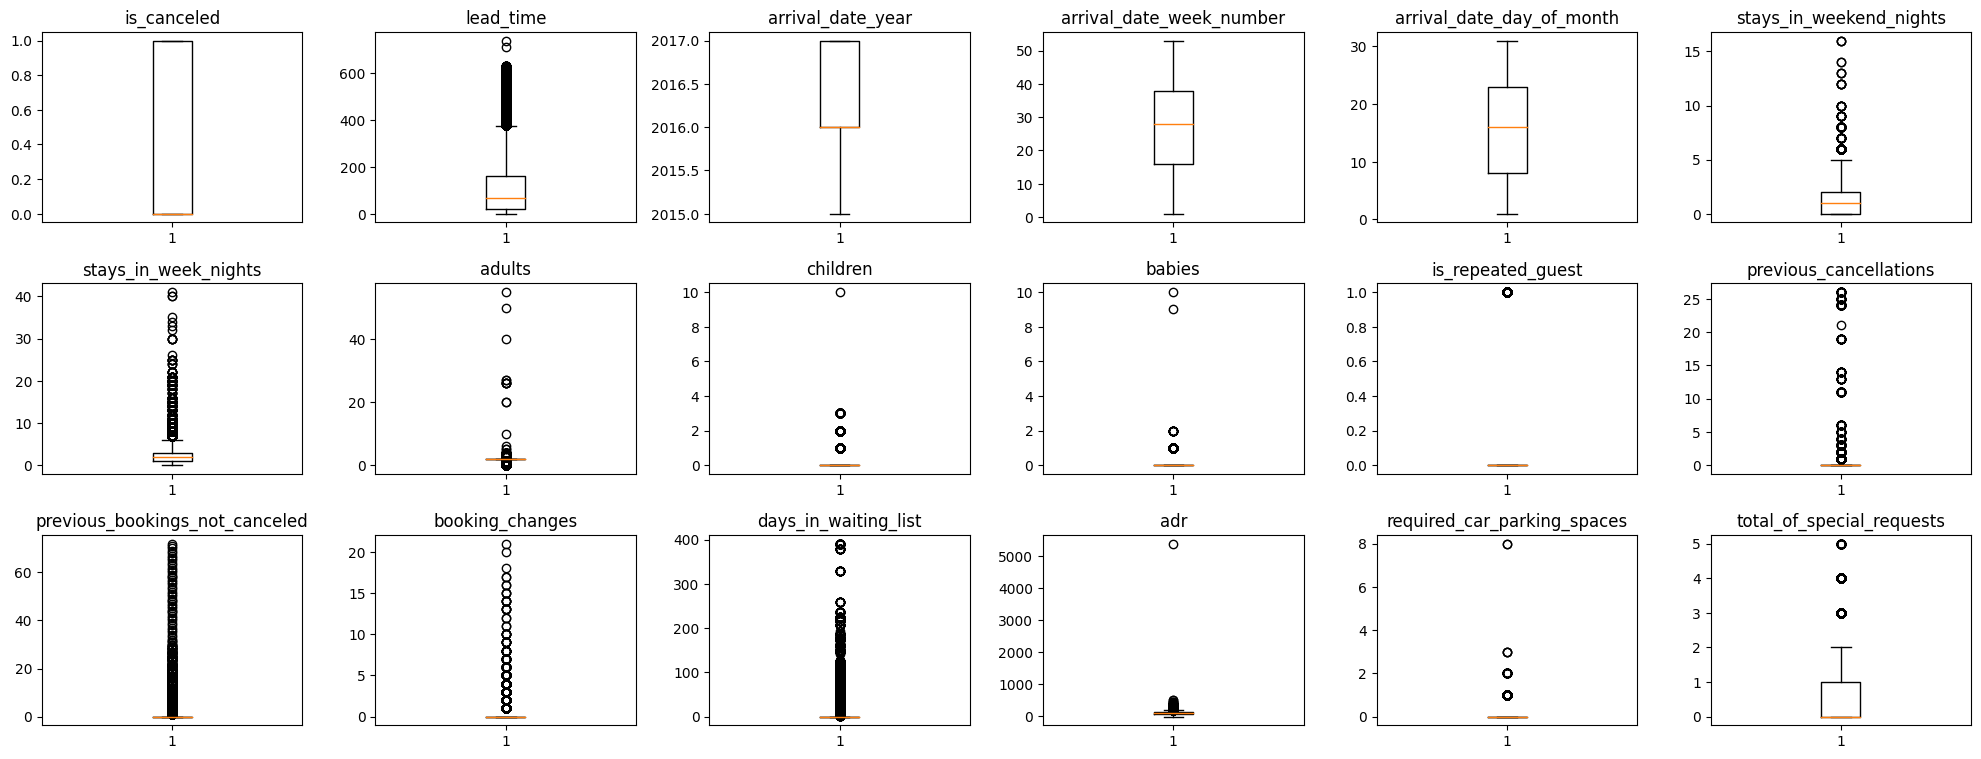

In [ ]:
#looking for outlier in each columns using box plot for each columns

# Select only numeric columns
numeric_columns = df.describe().columns[0:18]#excluding datetime col

# Set the size of the plot
plt.figure(figsize=(20, 15))

# Loop through each numeric column in the dataframe
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 6, i)  # Adjust subplot grid size as needed
    plt.boxplot(df[column])
    plt.title(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
#removing outliers from all the logical numerical columns
#removing outliers from the following columsn --
#lead_time
#adults
#children
#babies
#days_in_waiting_list
#adr

In [ ]:
# Define the columns to check for outliers
columns_to_check = ['lead_time', 'adults', 'children', 'babies', 'days_in_waiting_list', 'adr']

# Copy the DataFrame to avoid modifying the original one
df2 = df.copy()

# Loop through each column to calculate IQR and filter out outliers
for column in columns_to_check:
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Filter out the outliers
    df2 = df2[(df2[column] >= lower_limit) & (df2[column] <= upper_limit)]

In [ ]:
#checking for values in our new cleaned df2
df2.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,73789.000000,73789.000000,73789.000000,73789.000000,73789.000000,73789.000000,73789.000000,73789.0,73789.0,73789.0,73789.000000,73789.000000,73789.000000,73789.000000,73789.0,73789.000000,73789.000000,73789.000000,73789
mean,0.379162,104.437721,2016.132039,27.077180,15.627411,0.993292,2.593761,2.0,0.0,0.0,0.017509,0.101153,0.027524,0.164889,0.0,94.864033,0.058965,0.590928,2016-07-21 05:34:53.921858048
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,2.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,24.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,70.000000,0.000000,0.000000,2016-01-26 00:00:00
50%,0.000000,76.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,91.000000,0.000000,0.000000,2016-08-02 00:00:00
75%,1.000000,165.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,117.000000,0.000000,1.000000,2017-02-02 00:00:00
max,1.000000,375.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,2.0,0.0,0.0,1.000000,26.000000,31.000000,18.000000,0.0,193.330000,8.000000,5.000000,2017-09-14 00:00:00
std,0.485182,95.340229,0.722113,13.501771,8.842719,1.006657,1.941885,0.0,0.0,0.0,0.131160,1.022495,0.442974,0.578602,0.0,35.263659,0.238364,0.778109,NaN


# ***Data Analysis and Visualizations***

In [ ]:
#starting analysis with calculating the percentage of the bookings getting cancelled
cancelled_booking_percent = df2['is_canceled'].value_counts(normalize = True) * 100 #normalize parameter returns a percentage of the value count
print(cancelled_booking_percent) # this tells us 62.08% bookings are not cancelled while rest 37.91% are getting cancelled

is_canceled
0    62.083779
1    37.916221
Name: proportion, dtype: float64


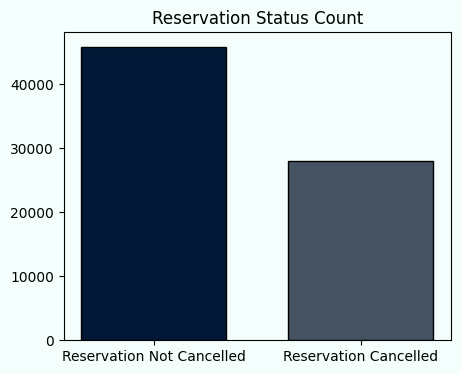

In [ ]:
#plotting the above findings as a bar/count plot
fig = plt.figure(figsize = (5,4))
ax = fig.add_subplot(111)
plt.gcf().patch.set_facecolor('#F4FFFD')
ax.set_facecolor('#F4FFFD')
ax.set_title('Reservation Status Count')
ax.bar(['Reservation Not Cancelled','Reservation Cancelled'], df2['is_canceled'].value_counts(), width = 0.7, edgecolor = 'k', color = ['#011936', '#465362'])
plt.savefig('bar_chart')

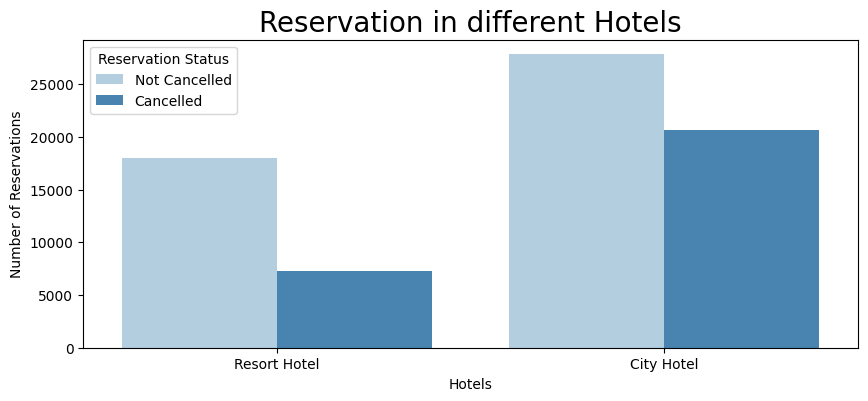

In [ ]:
#ploting a counting plot for both hotels cancellation count

fig = plt.figure(figsize = (10,4))
ax1 = sns.countplot(data =df2, x = df2['hotel'], hue = df2['is_canceled'], palette = 'Blues')
ax1.set_title('Reservation in different Hotels', size = 20)
handles,_ = ax1.get_legend_handles_labels()
legend_label = ['Not Cancelled','Cancelled']
ax1.legend(handles, legend_label, title = 'Reservation Status', loc = 'upper left')
ax1.set_xlabel('Hotels')
ax1.set_ylabel('Number of Reservations')
plt.savefig('Reservatiom in different hotels')

In [ ]:
#checking cancellation Rate in each hotel
Resort_df = df2[df2['hotel'] == 'Resort Hotel']

In [ ]:
round(Resort_df['is_canceled'].value_counts(normalize = True) * 100, 2) #printing % for cancellation

is_canceled
0    71.11
1    28.89
Name: proportion, dtype: float64

In [ ]:
City_df = df2[df2['hotel'] == 'City Hotel']

In [ ]:
round(City_df['is_canceled'].value_counts(normalize = True) * 100, 2) #printing % for cancellation

is_canceled
0    57.37
1    42.63
Name: proportion, dtype: float64

I believe there is some relationship between adr(avg daily rate) and booking in the city and resort hotels
we will check this by plotting a line chart for both of the hotels
first we will groupby data by date since there are many observations for a single date

In [ ]:
resort_adr = Resort_df.groupby('reservation_status_date')['adr'].mean()

In [ ]:
city_adr = City_df.groupby('reservation_status_date')['adr'].mean()

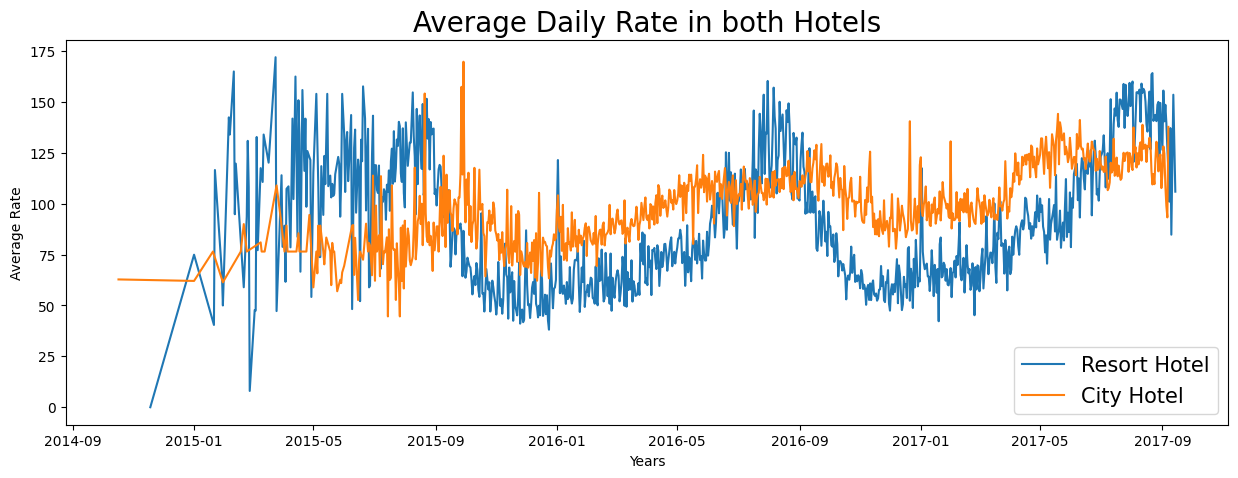

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.plot(resort_adr.index,resort_adr, label = 'Resort Hotel')
plt.plot(city_adr.index, city_adr, label = 'City Hotel')
plt.legend(fontsize = 15)
plt.title('Average Daily Rate in both Hotels', fontsize = 20)
plt.xlabel('Years')
plt.ylabel('Average Rate')
plt.savefig('Avg daily rate in both hotels')

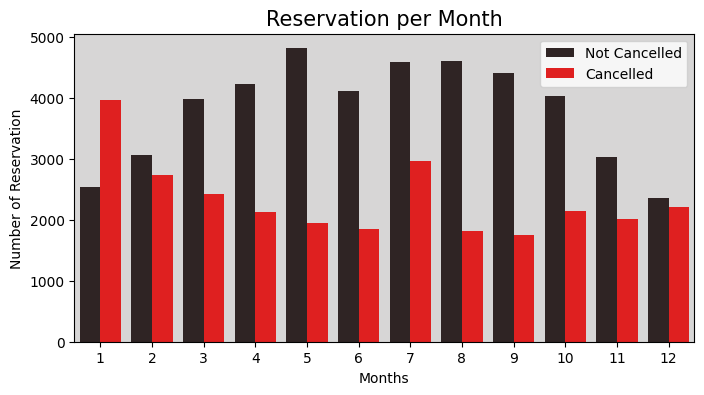

In [ ]:
# we will plot a count plot for each month to check cancellation for every month

df2['month'] = df2['reservation_status_date'].dt.month #creating a new column in df2 with the month of every obervation
fig = plt.figure(figsize= (8,4))
ax2 = sns.countplot(data = df2, x = df2['month'], hue = 'is_canceled', palette = 'dark:red')
ax2.set_facecolor('#D7D6D6')
handle,_ = ax2.get_legend_handles_labels()
plt.legend(handle, ['Not Cancelled', 'Cancelled'])
plt.title('Reservation per Month', fontsize = 15)
plt.xlabel('Months')
plt.ylabel('Number of Reservation')
plt.savefig('Reservation per Month')

we can see that when we have have most number of reservation then we only we have least amout of cancellation
with this knowledge we will check what is the price for those months
we will plot a bar chart on adr for each month


In [ ]:
tempmonth = df2[df2['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()

<ipython-input-31-583118dbd482>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'month', y = 'adr' , data = tempmonth, palette = 'icefire')


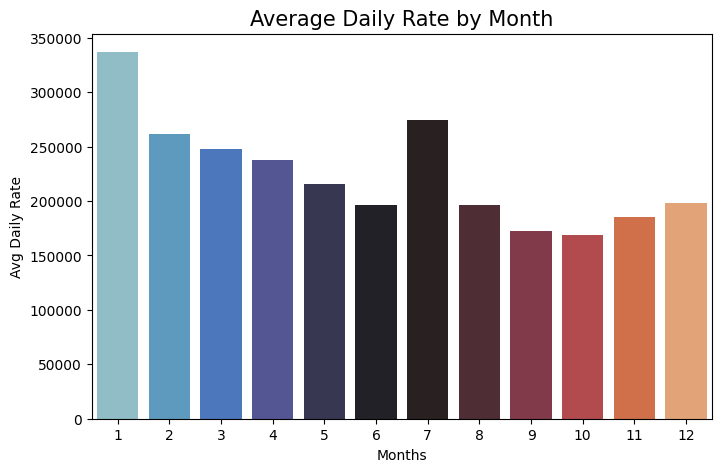

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'month', y = 'adr' , data = tempmonth, palette = 'icefire')
plt.xlabel('Months')
plt.ylabel('Avg Daily Rate')
plt.title('Average Daily Rate by Month', fontsize = 15)
plt.savefig('Avg daily rate by month')

**we can cleary see when the adr is high in a particular month then the cancellation rate is also high for that month**

now we will check if there is any problem with a particular country
we will plot a pie for top 10 county who cancels the reservations

In [ ]:

cancelled_df = df2[df2['is_canceled'] == 1] #making a new df with only those reservations which got cancelled
top10_country = cancelled_df['country'].value_counts()[:10] #calculating top 10 country using value counts function

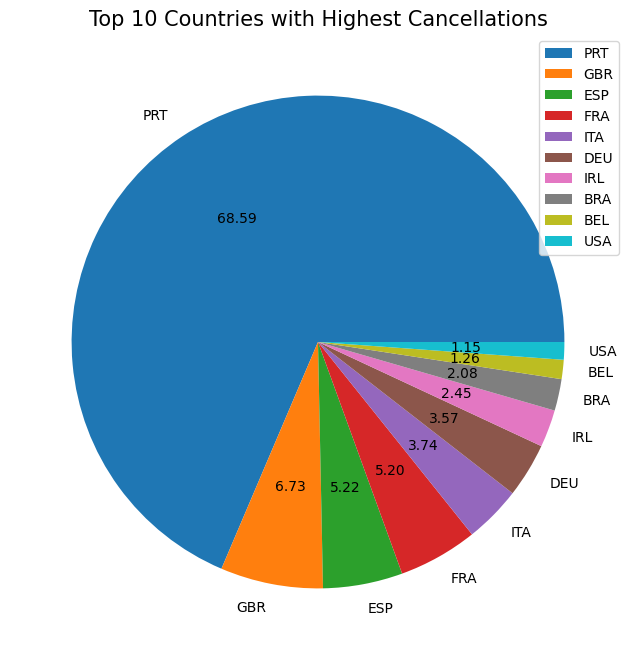

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(top10_country, autopct = '%0.2f', labels = top10_country.index)
plt.title('Top 10 Countries with Highest Cancellations', fontsize = 15)
plt.legend()
plt.savefig('pie chart for top10')

now we will analyze market segments and try to find out where most people coming from and which platfrom leds to most cancellations


In [ ]:
MarketSegment = round(df2['market_segment'].value_counts(normalize = True)*100, 2)

In [ ]:
print(MarketSegment) # we can see 50% of the people are booking from Online travel Agents

market_segment
Online TA        50.88
Offline TA/TO    20.65
Groups           16.76
Direct            9.80
Corporate         1.49
Complementary     0.41
Aviation          0.00
Name: proportion, dtype: float64


In [ ]:
cancel_market_segment = round(cancelled_df['market_segment'].value_counts(normalize = True)*100, 2)

In [ ]:
print(cancel_market_segment) #48.5% people book online who also cancel their reservations later

market_segment
Online TA        48.57
Groups           29.84
Offline TA/TO    16.45
Direct            3.81
Corporate         1.16
Complementary     0.16
Name: proportion, dtype: float64


hence we can say even though people book the most from online TA, still they are the ones who also cancel it,
reason could be; hotel didn't stand on their expectation, or the picture online were different from hotel in real

*To give more proofs that price is the factor which is influencing the cancellation of the reservation, we will plot avg daily rate for the reservations which got cancelled and which did not cancelled*








In [ ]:
#we have a df of all reservations that got cancelled, from that we will groupby on reservation status date and take the mean of the adr
#and will do same for the reservations which did not cancelled

In [ ]:
is_cancelled_adr = cancelled_df.groupby('reservation_status_date')['adr'].mean().reset_index().sort_values('reservation_status_date')
# it creates a new df with adr and date

In [ ]:
is_cancelled_adr = is_cancelled_adr[(is_cancelled_adr['reservation_status_date'].dt.year >= 2016) & (is_cancelled_adr['reservation_status_date'].dt.year < 2018)]
#since the data is inconsistent and we want to plot a grpah on it so we filter it out and have only the data of 2016 - 2018

In [ ]:
not_calcelled_df = df2[df2['is_canceled'] == 0]
not_cancelled_adr = not_calcelled_df.groupby('reservation_status_date')['adr'].mean().reset_index()# it creates a new df with adr and date
not_cancelled_adr.sort_values('reservation_status_date', inplace = True)

In [ ]:
not_cancelled_adr = not_cancelled_adr[(not_cancelled_adr['reservation_status_date'].dt.year >= 2016) & (not_cancelled_adr['reservation_status_date'].dt.year < 2018)]


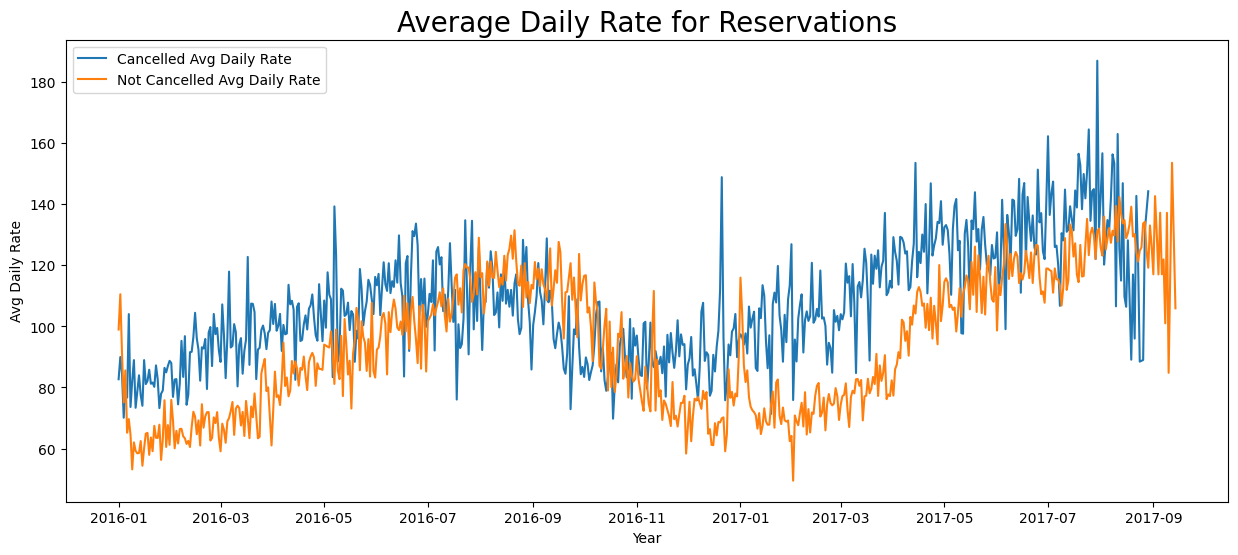

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(is_cancelled_adr['reservation_status_date'], is_cancelled_adr['adr'], label = 'Cancelled Avg Daily Rate')
plt.plot(not_cancelled_adr['reservation_status_date'],not_cancelled_adr['adr'], label = 'Not Cancelled Avg Daily Rate')
plt.legend()
plt.title('Average Daily Rate for Reservations', fontsize = 20)
plt.xlabel('Year')
plt.ylabel('Avg Daily Rate')
plt.savefig('avg daily rate line chart')

*we can cleary see that when the adr is high the cancellation rate is also very high this again proves that price is the factor affecting cancellation*